STAT206 Final Project-Video Game Sales

STAT 206 Video Game industry trend analysis 

Coded through Python

Data set used: 

1: vgsales.csv.zip
This data set provides a comprehensive list of video games with sales exceeding 100,000 copies. The data was collected through web scraping from vgchartz.com, ensuring a robust compilation of sales figures for various games across multiple regions and platforms.

2: vgchartz-2024-1.csv
This data set includes a comprehensive list of video games from 2017 up to 2024, collected through the same method in the previous data set. Include most of the variables from the previous data set, as well as an additional variable of the last date updated.

3: Steam-game-set.csv
This data set includes a list of video games that are published on Steam (PC platform), with significantly more games as it did not have the bar of sales exceeding 100,000 copies. It does not include sales, as the data is collected through scraping on Steam and combined with other public sources. 


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import os.path as osp
import seaborn as sns
import plotly.express as px

Objective of the project:

Perform descriptive analysis on the data available and test the hypothesis in regard to trends in order to understand what occurred to the video game industry since the 1980s.

First, we start with the hypothesis: Action-Adventure game genre has become more common as the game generation moves forward, overtaking other game genres to become the largest genre. 
In order to determine whether or not this is quantitatively true, we will first summarize how many action-adventure game exist in the vgs dataset, then we will organize these counts by years and see whether or not it is a growing trend.


In [2]:
vgs = pd.read_csv("c:/Users/swmax/Downloads/vgsales.csv")
vgs.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [3]:
vgs.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
action_adventure_count = vgs[vgs['Genre'].isin(['Action', 'Adventure'])]
action_adventure_count

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
...,...,...,...,...,...,...,...,...,...,...,...
16582,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.00,0.01
16584,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16587,16068,Aquaman: Battle for Atlantis,XB,NaN,Action,Unknown,0.01,0.00,0.00,0.00,0.01
16595,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01


According to the count, there is 4602 action-adventure game that has sales over 100,000 since 1980, it takes up to more than a quarter of the total amount of games in this dataset. 

In [5]:
genre_counts = vgs['Genre'].value_counts()
vgs['Genre'] = vgs['Genre'].replace({'Action': 'Action/Adventure', 'Adventure': 'Action/Adventure'})
genre_counts

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

**Q1:Have the game Genre Action Adventure been on the increase since 1980?**

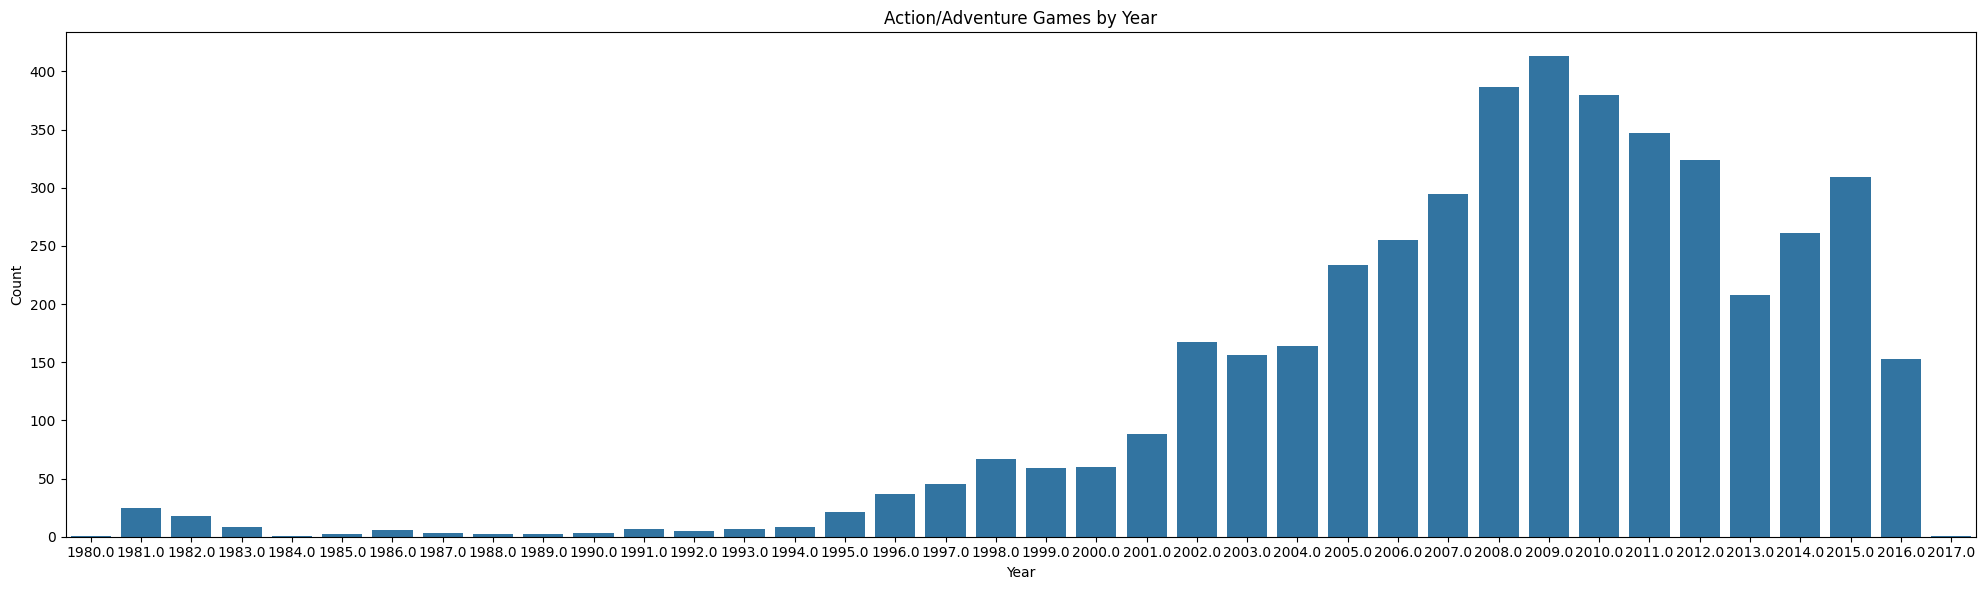

In [6]:
year_counts = action_adventure_count.groupby('Year').size().reset_index(name='Count')
plt.figure(figsize=(20, 6))
sns.barplot(x='Year', y='Count', data=year_counts)
plt.title('Action/Adventure Games by Year')
plt.tight_layout()
plt.show()


As we can see in the bar plot above, there is a clear trend of growing in action-adventure genre game. However, there is a sudden drop around 2012 ~ 2013. We do not know if this is a genre specific trend or industry trend. In order to check the nature of this phenomenon, we will create two more bar plots with the other two popular genres: Sport (with 2346 games since 1980) and Misc (with 1739 games since 1980).

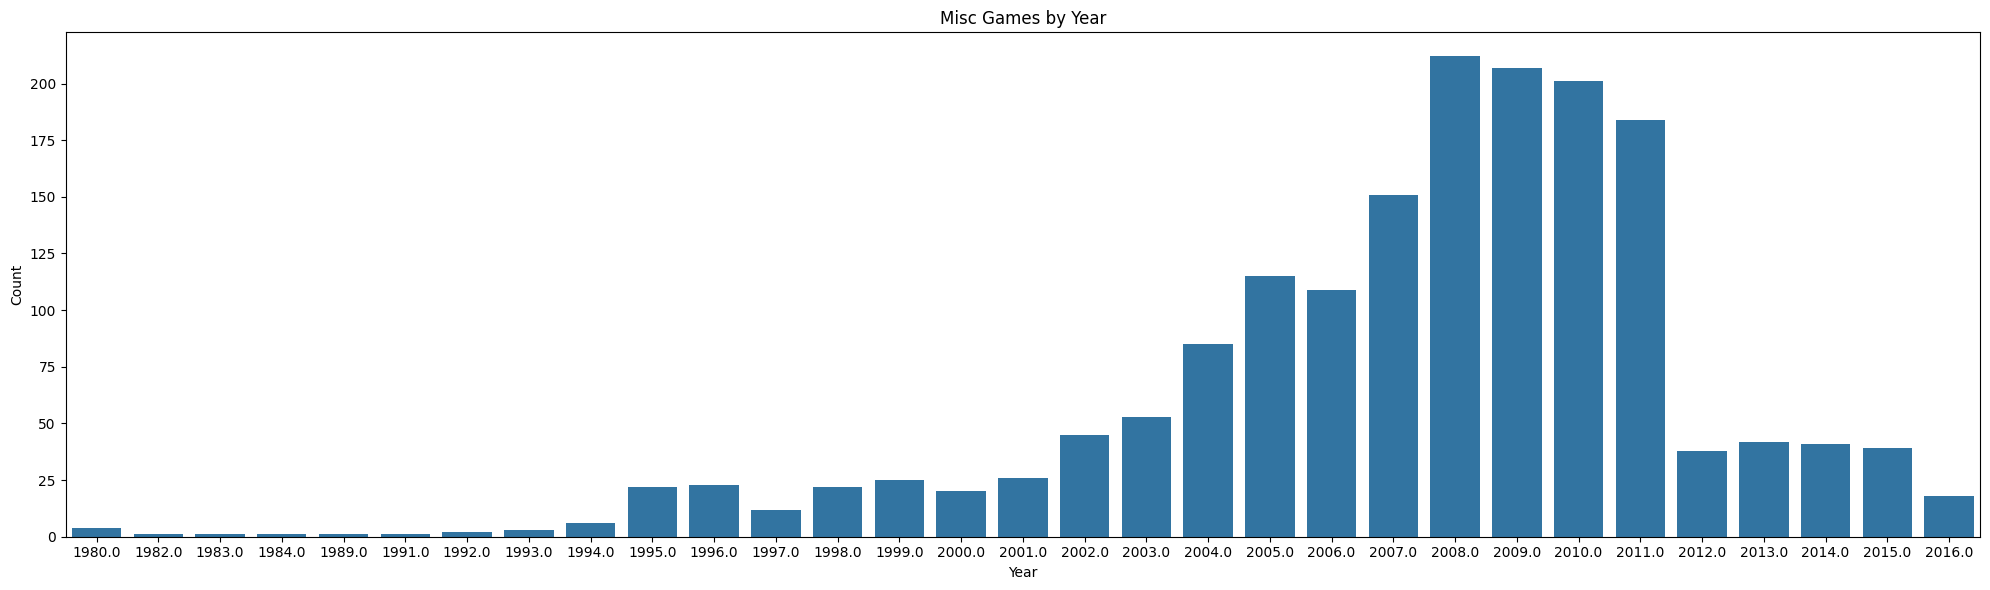

In [7]:
Misc_count = vgs[vgs['Genre'].isin(['Misc'])]
year_counts3 = Misc_count.groupby('Year').size().reset_index(name='Count')
plt.figure(figsize=(20, 6))
sns.barplot(x='Year', y='Count', data=year_counts3)
plt.title('Misc Games by Year')
plt.tight_layout()
plt.show()

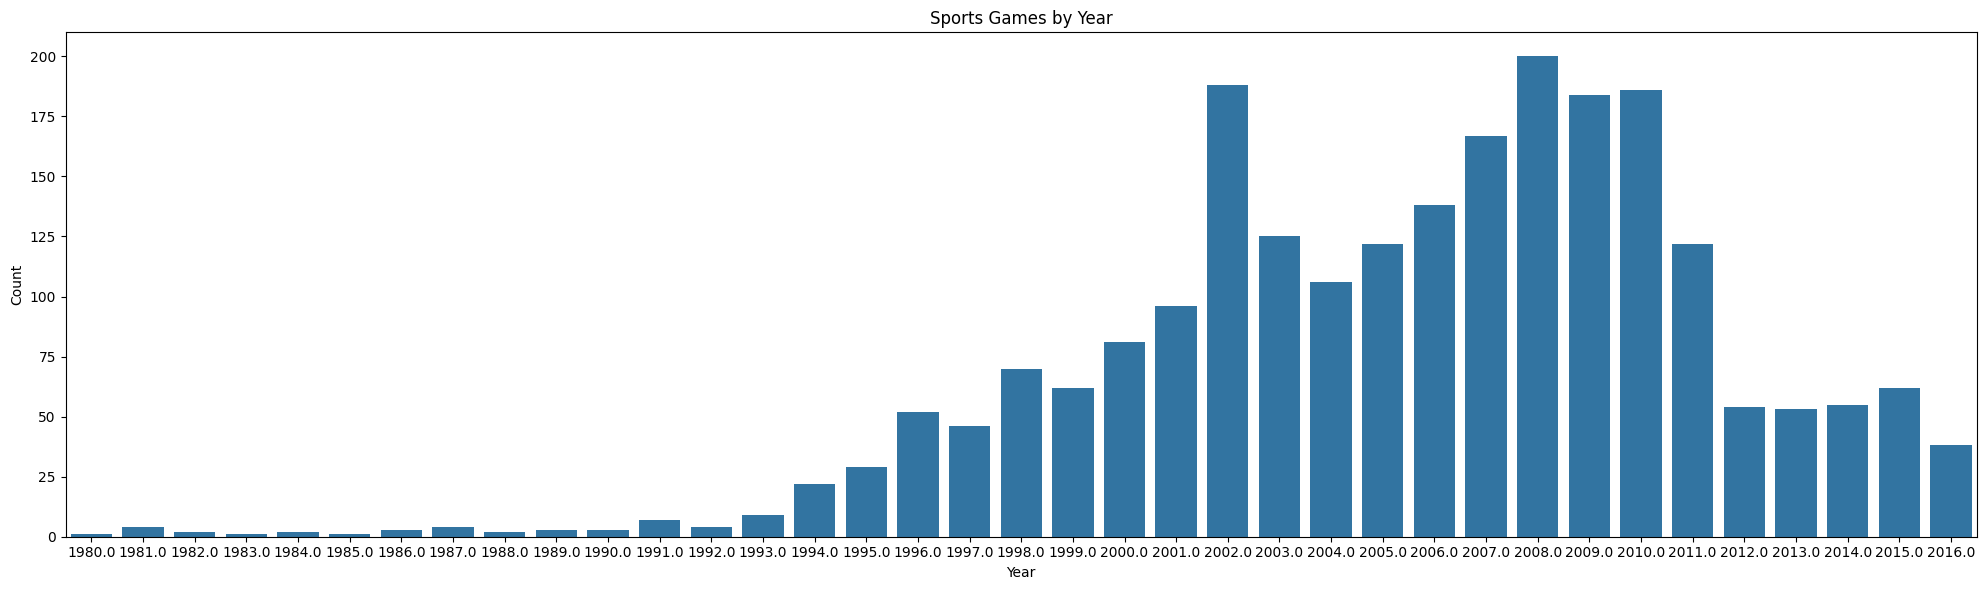

In [8]:
sports_count = vgs[vgs['Genre'].isin(['Sports'])]
year_counts2 = sports_count .groupby('Year').size().reset_index(name='Count')
plt.figure(figsize=(20, 6))
sns.barplot(x='Year', y='Count', data=year_counts2)
plt.title('Sports Games by Year')
plt.tight_layout()
plt.show()

As we can see from the two plots above, the decline in number of game releases has a sharp decrease around 2012. It is unknown why there is a major decline for some of the most popular game genres in the industry that occurred in 2012. 

The current hypothesis is that the release of AAA titles scared away the more minor game releases and increased the complexity of video game development (skyrocketing development costs). For example, in 2011, some of the main titles released include Batman: Arkham City, The Elder Scrolls V: Skyrim, Portal 2, The Legend of Zelda: Ocarina of Time 3D, etc. These games have development budgets ranging from 12 million to 85 million dollars. It is far beyond the budgets available for smaller studios. 

This period is also close to the release time of the first batch of the Eighth generation of video game consoles (Wii U, PS4, Xbox One, etc.), which indicates a turn in trends in the video game industry to the more grand, open, and visually stunning game (in another word, more expensive) (Gorman, 2013).

In order to verify this trend, we make another plot with all the games released by platform (in this case, consoles). 


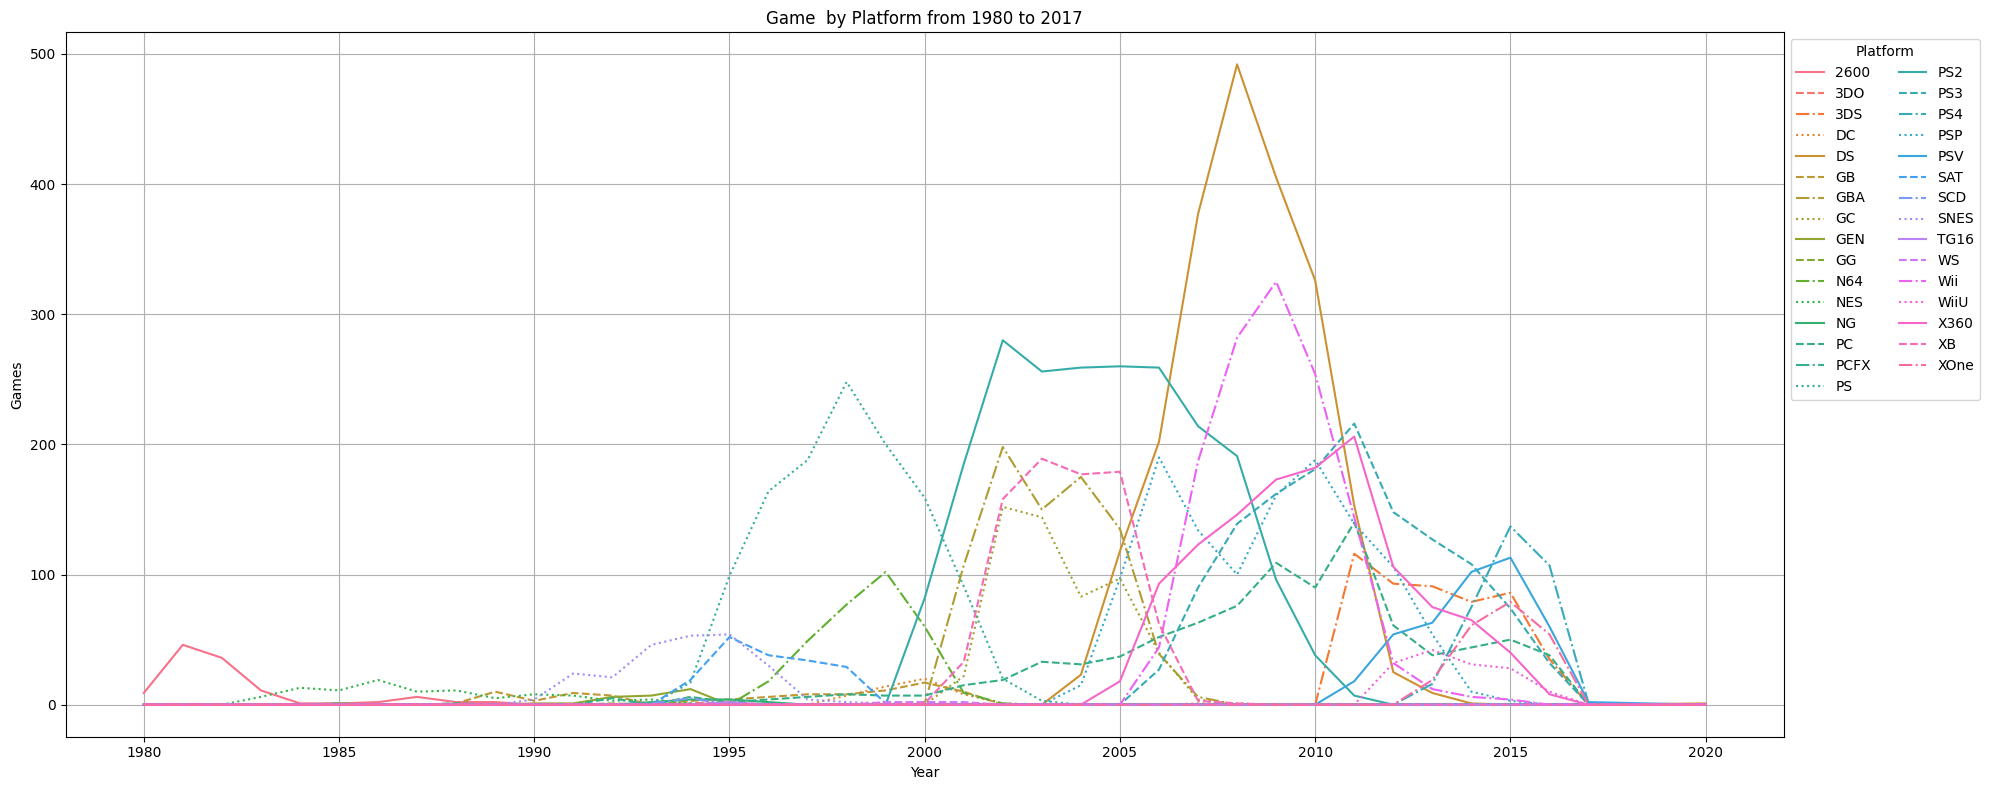

In [9]:
platform_per_year = vgs.groupby(['Year', 'Platform']).size().reset_index(name='Count')
ppy = platform_per_year.pivot(index='Year', columns='Platform', values='Count').fillna(0)
nu_platforms = len(ppy.columns)
palette = sns.color_palette("husl", n_colors=nu_platforms)

plt.figure(figsize=(20, 8))
line_styles = ['-', '--', '-.', ':'] * 3
for i, platform in enumerate(ppy.columns):
    plt.plot(ppy.index, ppy[platform], color= palette[i], linestyle=line_styles[i % 4],label=platform)
plt.title('Game  by Platform from 1980 to 2017')
plt.xlabel('Year' )
plt.ylabel('Games')
plt.legend(title='Platform', bbox_to_anchor=(1, 1), loc='upper left', ncol=2)
plt.grid()
plt.tight_layout()
plt.show()

As we can see from the complex line plot above, the trend generally follows the previous plot based on genre, future supporting the hypothesis that this might be an industry-wide shift in trend. The general tendence is that there is a steady growth from 1980 to 2005, the industry reaches a peak around 2009, and a sudden drop in number of games published starting in 2012. Once again there seems to be no clear explanation of what led to this drop, as majority of the sources available online show no major decline in the industry. 

We can also see from the plot that the period with largest growth is when the fifth and sixth generations of consoles were out and the transition period where video games started to have a 3D polygon (more so than before), which can be seen as a new stage for the industry. Some might consider this period more friendly to the indie/small developer, as the development costs have yet to reach the absurd level they will be at in the next two decades (for example, Metal Gear Solid 2: Sons of Liberty costs at most 10 million, and one can assume similar costs for Halo: Combat Evolved) (Grajales, 2012).


Hypothesis for the decline: 

    1: The cause of the decline is the increasing development cost and time, which partially explains the sharp decline in video games released yearly. 

    2: The other cause is the rise of PC platforms. Keep in mind this is also where PC gaming has just started; Steam was not launched till 2003 and did not gain significant momentum until after 2008. The current data set includes no games from post-2017 and only has console games.


In order to verify this information, we also need information on the data for 2017 to see whether the trend continues or does it bounce back to growth.

In [10]:
vgs2024 = pd.read_csv("c:/Users/swmax/Downloads/vgchartz-2024-1.csv")
vgs2024 = vgs2024.drop_duplicates(subset=['title'])
vgs2024.head(10)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,9/17/2013,NaN
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,10/28/2002,NaN
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,11/6/2015,1/14/2018
5,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,11/8/2011,NaN
6,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,11/9/2010,NaN
7,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,10/26/2018,11/2/2018
8,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,11/13/2012,4/7/2018
10,Call of Duty: Modern Warfare 2,X360,Shooter,Activision,Infinity Ward,9.5,13.53,8.54,0.08,3.63,1.28,11/10/2009,NaN
11,Call of Duty: WWII,PS4,Shooter,Activision,Sledgehammer Games,8.1,13.40,4.67,0.40,6.21,2.12,11/3/2017,12/31/2017
13,Grand Theft Auto III,PS2,Action,Rockstar Games,DMA Design,9.5,13.10,6.99,0.30,4.51,1.30,10/23/2001,NaN


In [12]:
genre_counts_2024= vgs2024['genre'].value_counts()
genre_counts_2024

genre
Misc                6567
Action              5253
Adventure           4140
Role-Playing        3632
Sports              3206
Shooter             3051
Strategy            2687
Puzzle              2447
Simulation          2258
Platform            1991
Racing              1896
Fighting            1362
Action-Adventure     646
Visual Novel         307
Music                146
Party                 88
MMO                   62
Education             27
Board Game            25
Sandbox                7
Name: count, dtype: int64

After acquiring vgs 2024 (the 2nd data set), we can see that the total number of action-adventure genre games is 9393 (5253 + 4140), which is almost double the amount from the previous data set, this might be caused by incompleteness from the previous data and/or the selection method is more loss on the 2nd data set. In order to ensure the trend is consistent with the previous data, we will create another bar plot 

C:\Users\swmax\AppData\Local\Temp\ipykernel_10968\2083309864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AA_count['year'] = pd.to_datetime(AA_count['release_date']).dt.year


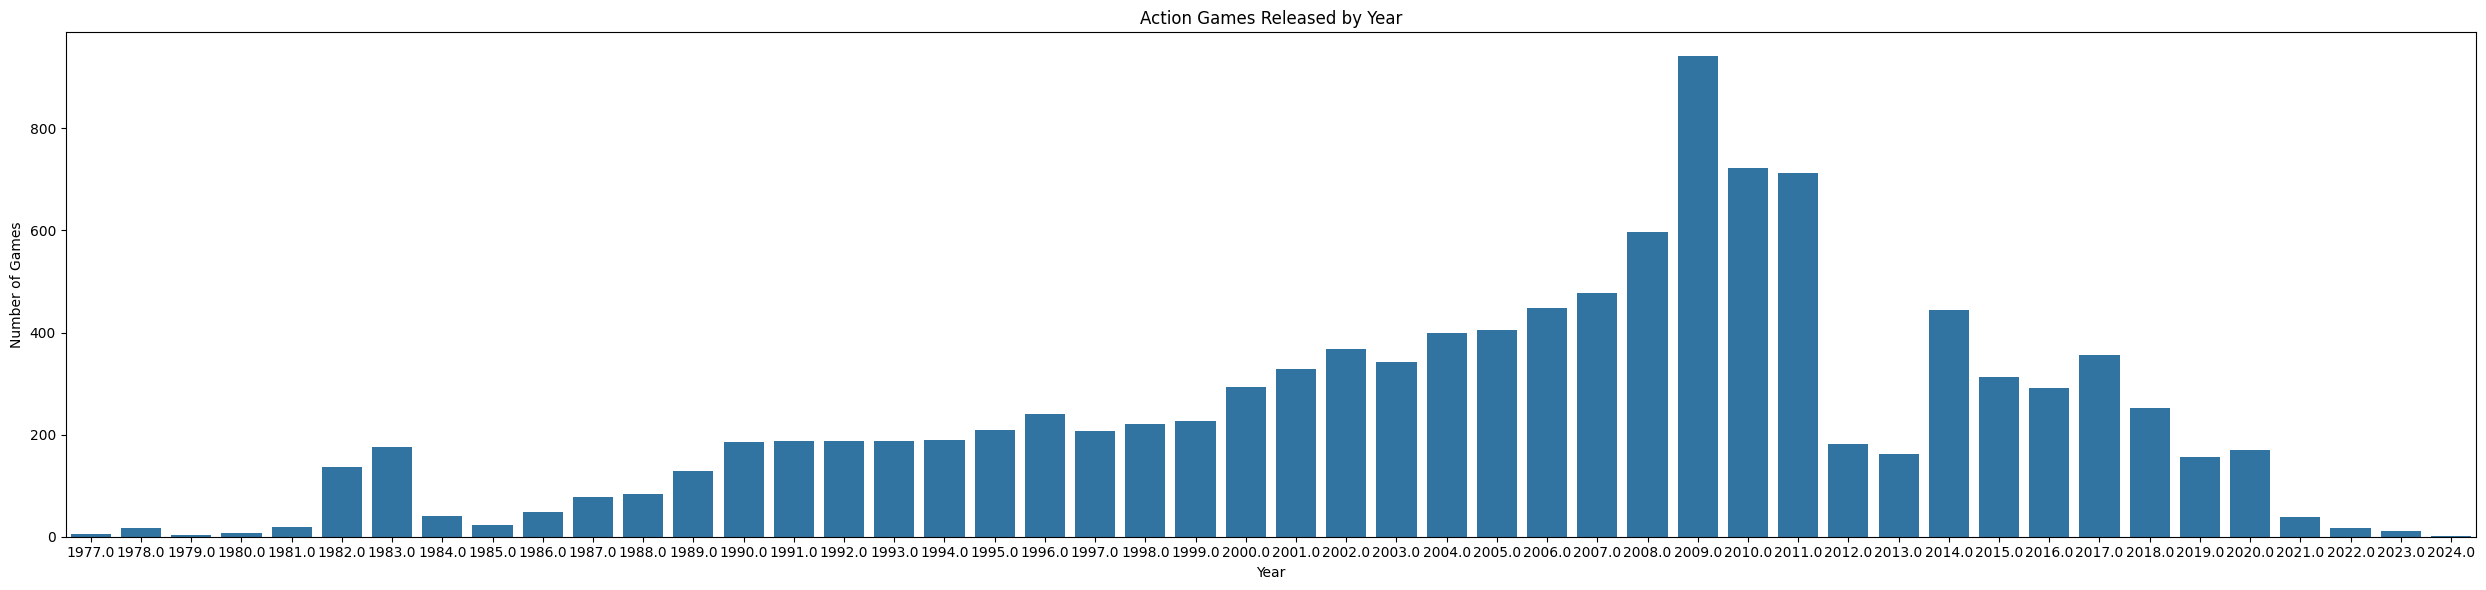

In [13]:
AA_count = vgs2024[vgs2024['genre'].isin(['Action', 'Action.Adventure', 'Adventure', 'Shooter'])]
AA_count['year'] = pd.to_datetime(AA_count['release_date']).dt.year
year_counts2024 = AA_count.groupby('year').size().reset_index(name='Count')
plt.figure(figsize=(25, 6))
sns.barplot(x='year', y='Count', data=year_counts2024)
plt.title('Action Games Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.show()

From the bar plot above, we can see that the trend is consistent with the previous data set, and from the additional data post 2017, we can see that the decline continues to 2024. 

Now in order to test whether the hypothesis should be rejected or not, we need to compute a comparison of the video game development costs for different generations of consoles, as well as data from video game published through PC platforms. 


Considering the largest PC platform is through Steam, we will use a data set that collected the number of video games in steam (keep in mind there is no sales in this data as it is confidential for Steam, and the authors do not want to violate any laws). 


**Q2: Is the rise of PC platforms correlated with the sharp decline of console game releases?**

In [14]:
vgsSteam = pd.read_csv("c:/Users/swmax/Downloads/Steam-game-set.csv")
vgsSteam = vgsSteam.drop_duplicates(subset=['Game'])
vgsSteam.head(10)

,Metascore,Price,Game_Type,Game,Release_date,Owners,Average_Hours-Played_Since_2009,Median_Hours_Played_Since_2009,Publishers
0,90.00%,$0.00,Strategy,Counter-Strike: Global Offensive,9-Jul-13,"200,000,000",26,16,Valve
1,96.00%,$0.00,Action,Dota 2,9-Jul-13,"200,000,000",26,16,Valve
2,70.00%,$23.99,RPG,Team Fortress 2,28-Sep-21,"100,000,000",33,25,Amazon Games
3,70.00%,$23.99,Adventure,ARK: Survival Evolved,28-Sep-21,"100,000,000",33,25,Amazon Games
4,96.00%,$23.99,Action,PUBG: BATTLEGROUNDS,28-Sep-21,"100,000,000",33,25,Amazon Games
5,95.00%,$0.00,Action,Black Squad,21-Dec-17,"100,000,000",13,4,"KRAFTON, Inc."
6,NaN,$0.00,Adventure,Borderlands 2,21-Dec-17,"100,000,000",13,4,"KRAFTON, Inc."
7,96.00%,$0.00,Action,Counter-Strike,10-Oct-07,"100,000,000",25,9,Valve
8,96.00%,$0.00,Action,New World,21-Aug-12,"100,000,000",13,5,Valve
9,89.00%,$4.99,RPG,Half-Life 2,17-Sep-12,"20,000,000",3,3,"2K, Aspyr (Mac), Aspyr (Linux)"


In [16]:
genre_counts_Steam= vgsSteam['Game_Type'].value_counts()
vgsSteam['Game_Type'] = vgsSteam['Game_Type'].replace({'Action': 'Action/Adventure', 'Adventure': 'Action/Adventure'})
genre_counts_Steam

Game_Type
Action/Adventure    20211
Indie               16842
Strategy             5350
Simulation           4859
RPG                  4714
Sports               1114
Name: count, dtype: int64

From the counts we can see this data set is on a much larger scale than the previous two set combined, and action-adventure is still the largest genre here, supporting out initial hypothesis in regard to genre. In order to see the trend of the PC platform growth, we will make a bar plot group the number of game release by year.

C:\Users\swmax\AppData\Local\Temp\ipykernel_10968\347006253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vgsSteam_clean['year'] = vgsSteam_clean['year'].astype(int)


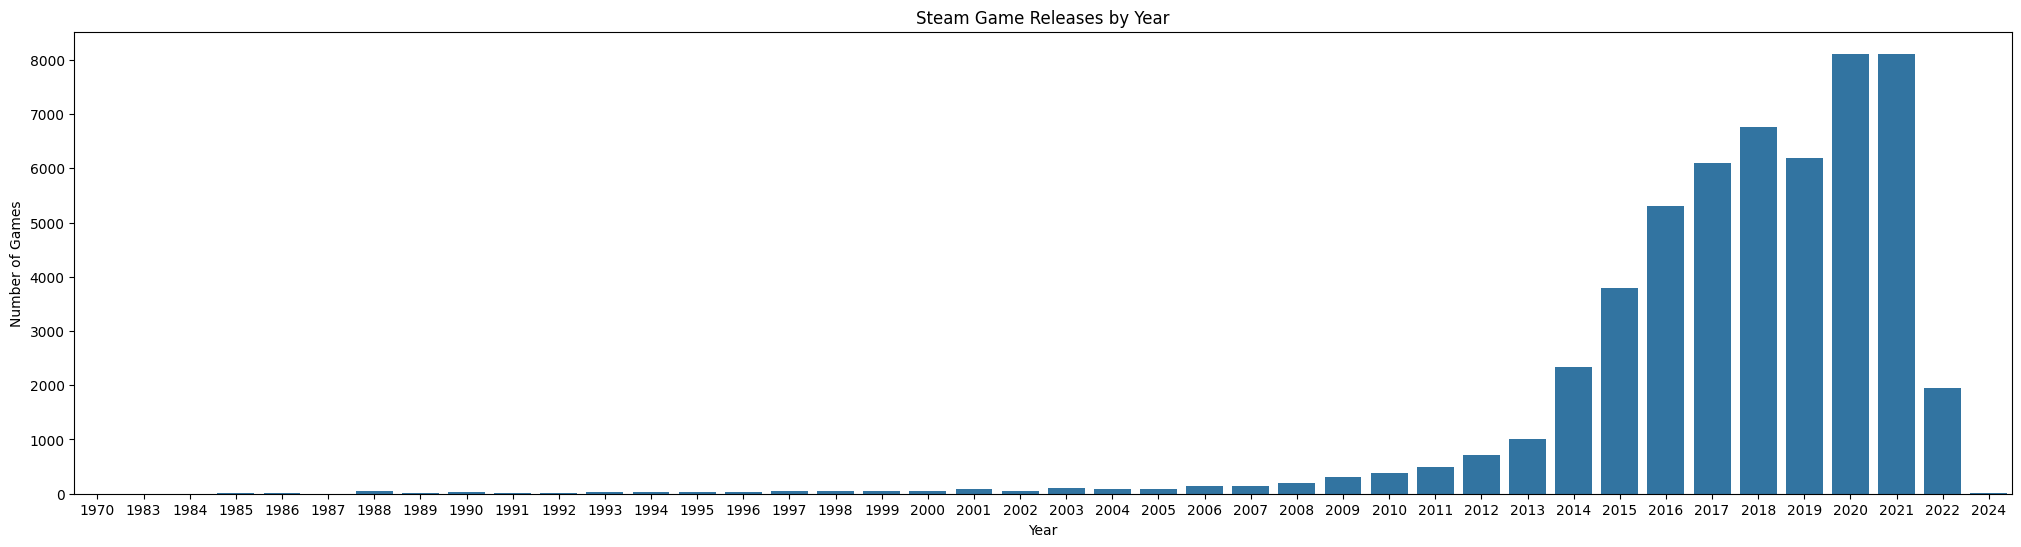

In [17]:
vgsSteam['year'] = pd.to_datetime(vgsSteam['Release_date'], format='%d-%b-%y',   errors='coerce').dt.year
vgsSteam_clean = vgsSteam.dropna(subset=['year'])
vgsSteam_clean['year'] = vgsSteam_clean['year'].astype(int)
year_counts_Steam = vgsSteam_clean.groupby('year').size().reset_index(name='Count')
yearly_counts_Steam = year_counts_Steam.sort_values('year')
plt.figure(figsize=(25, 6))
sns.barplot(x='year', y='Count', data=yearly_counts_Steam)
plt.title('Steam Game Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()


From the plot we can see evidence supporting the previous hypothesis about growth in PC platforms has led to less games being published in consoles. Keep in mind that the scale of this graph is also in the thousands rather than in hundreds in the previous plots.


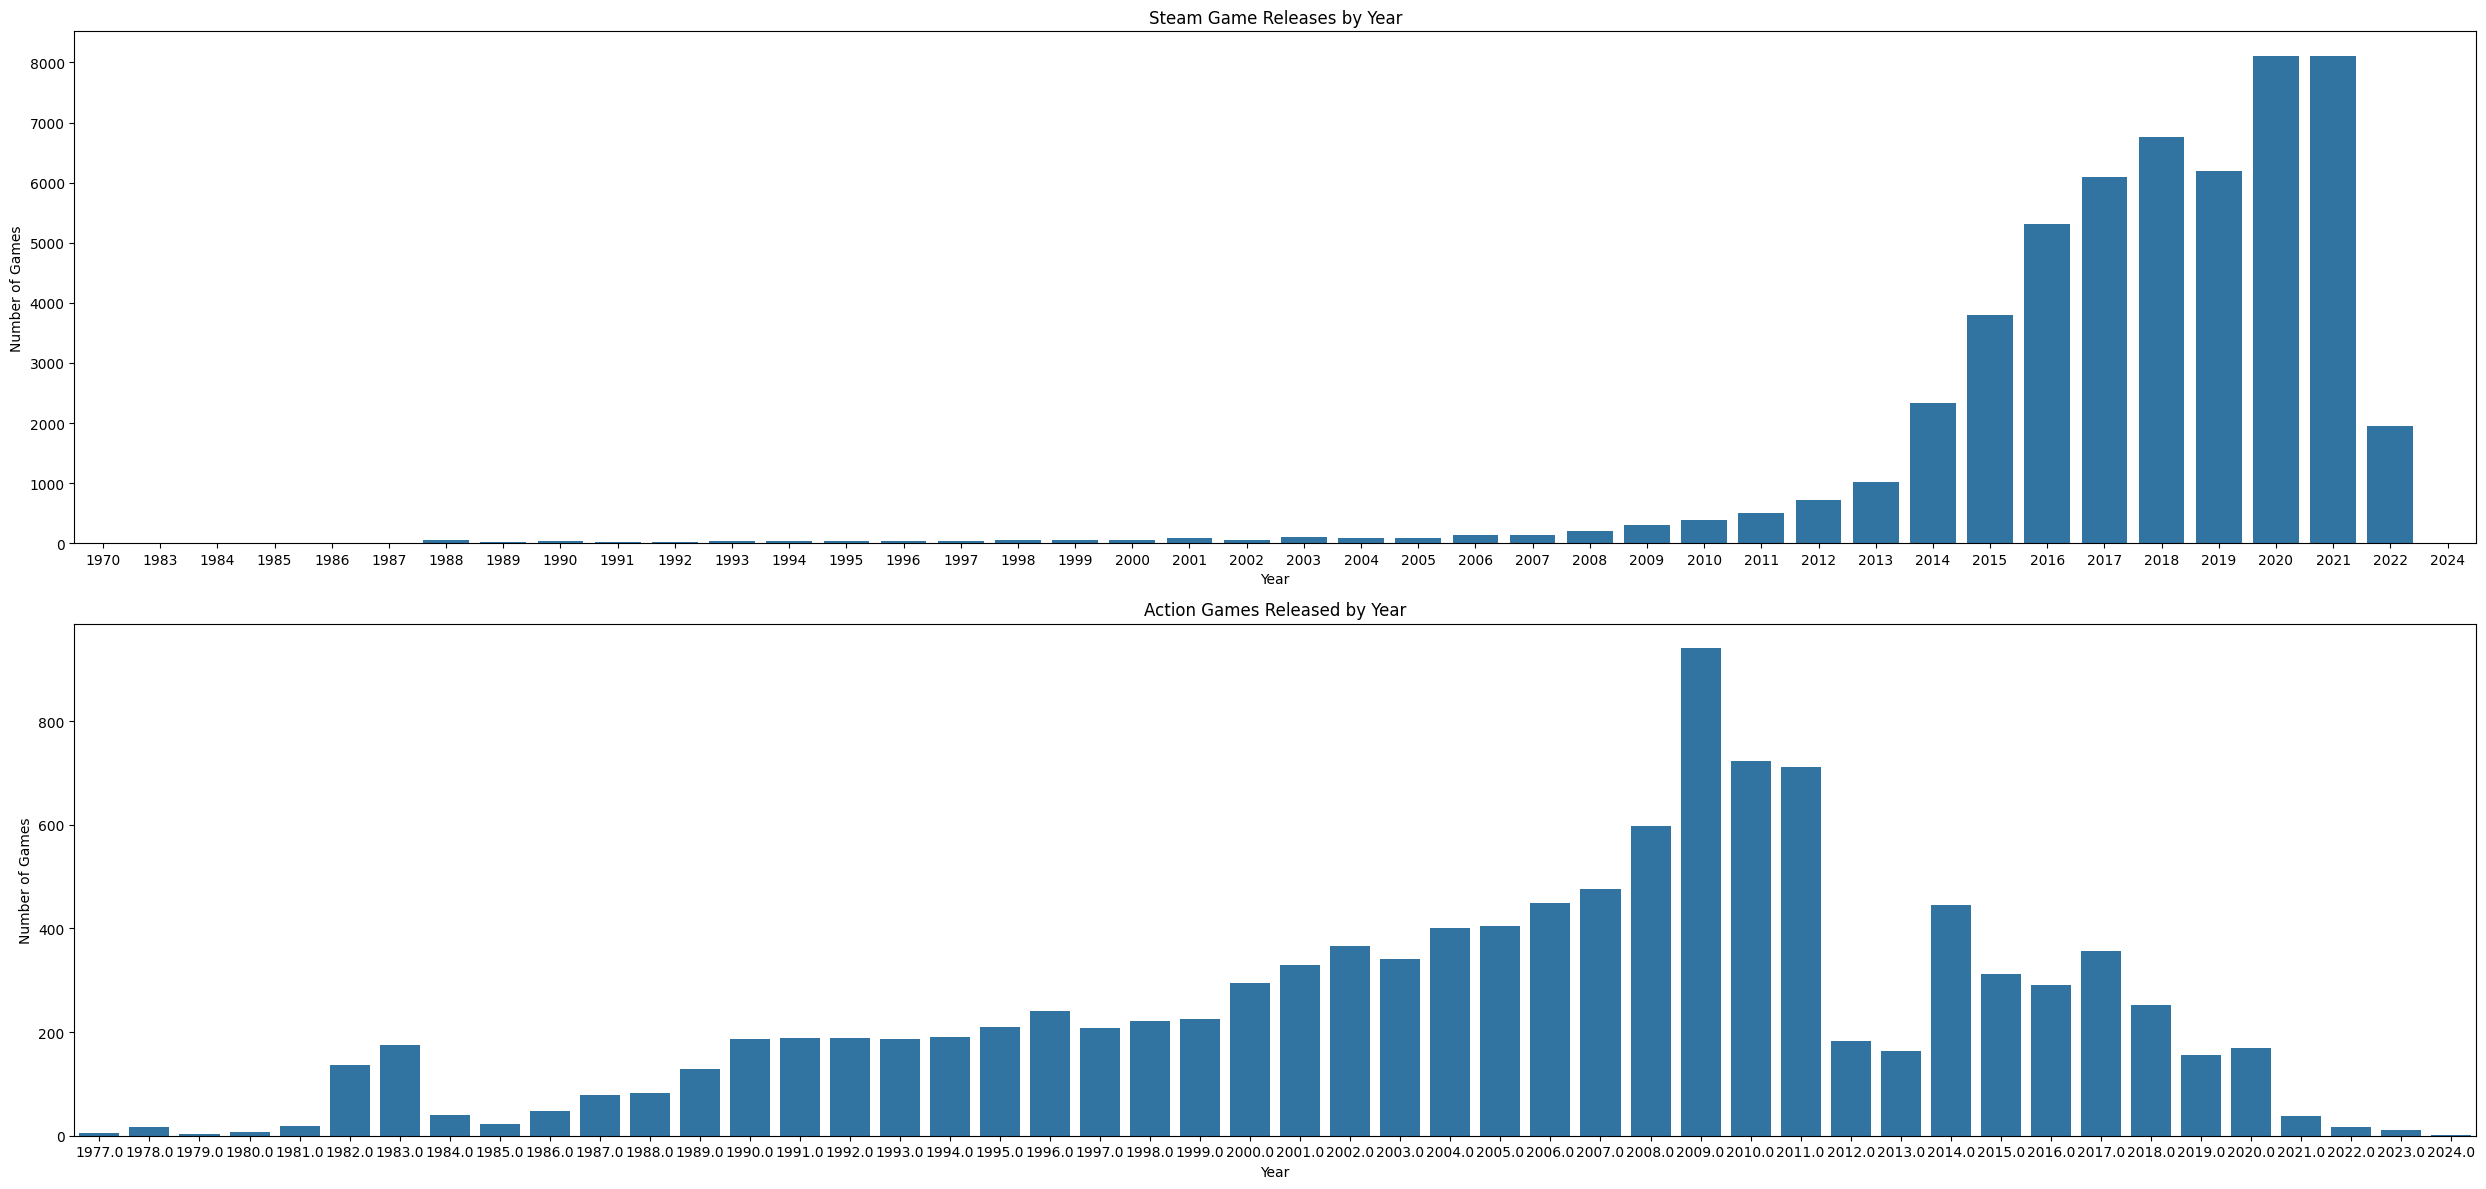

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 12))

sns.barplot(x='year', y='Count', data=yearly_counts_Steam, ax=ax1)
ax1.set_title('Steam Game Releases by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Games')

sns.barplot(x='year', y='Count', data=year_counts2024, ax=ax2)
ax2.set_title('Action Games Released by Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Games')

plt.tight_layout()
plt.show()

A side-by-side comparison shows there is a clear connection between the two, where consoles game publish drop, the PC game publishing grow significantly. In truth, there are more games published now than it has ever before, but in a different way. Keep in mind that the scale of Steam graph is also in the thousands rather than in hundreds in the bottom plot.

**Q3: Is the sharp decline in video game release correlated with the increasing development cost and time spent on consoles?**

Due to the lack of available data and both development costs and time (especially in the early generation), we will use sample data (selected from the milestone title of each generation) to simulate the trend of development cost and time.


The list of game selected are as follows:

Generation 1: Table Tennis, Breakout

Generation 2:  Space Invaders, Pac-Man, Donkey Kong

Generation 3: Super Mario Bros, The Legend of Zelda, Final Fantasy

Generation 4: Sonic the Hedgehog, Street Fighter II: The World Warrior, Pokémon Red and Blue

Generation 5: Castlevania: Symphony of the Night, GoldenEye 007 (1997), The Legend of Zelda: Ocarina of Time

Generation 6: Metal Gear Solid 2: Sons of Liberty, Metroid Prime, Resident Evil 4 

Generation 7: Halo 3, BioShock, Assassin’s Creed II

Generation 8: Super Mario Odyssey, Red Dead Redemption 2, Elden Ring



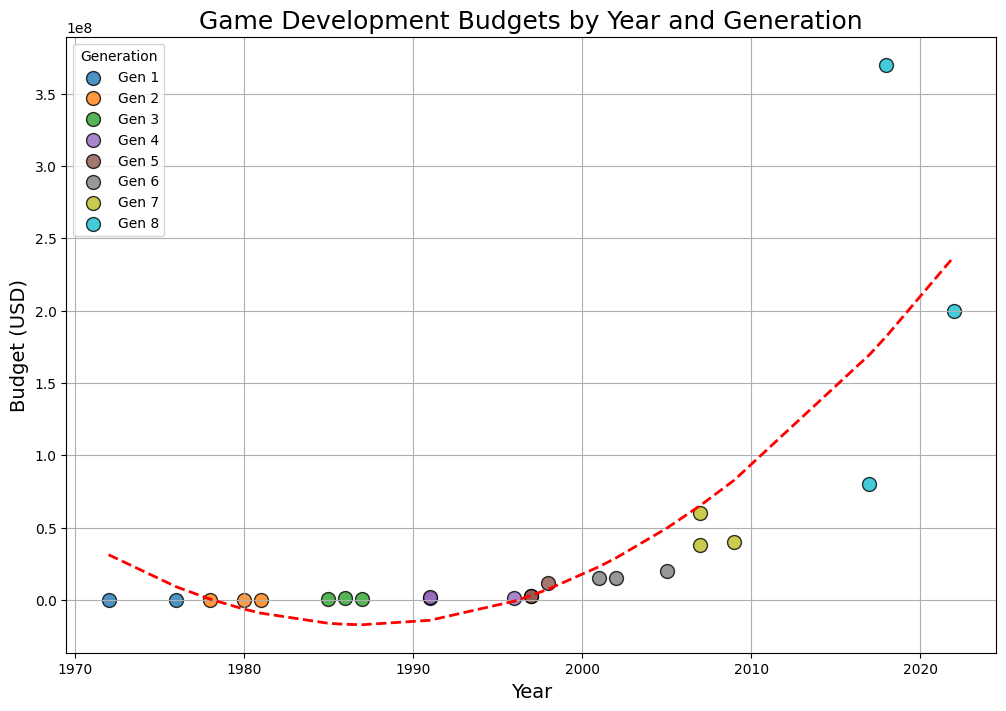

In [19]:

TB = pd.read_csv('GameBT.csv', skipinitialspace=True)
TB.columns = TB.columns.str.strip()

generation_colors = plt.cm.tab10(np.linspace(0, 1, 8)) 

plt.figure(figsize=(12, 8))

scatters = []
for gen in range(1, 9):
    mask = TB['Generation'] == gen
    scatter = plt.scatter(TB[mask]['Year'], TB[mask]['budgets'], color=generation_colors[gen-1], alpha=0.8, edgecolor='k', s=100, label=f'Gen {gen}')
    scatters.append(scatter)

x = TB['Year']
y = TB['budgets']
coefficients = np.polyfit(x, y, 2)
trend = coefficients[0] * x**2 + coefficients[1] * x + coefficients[2]
plt.plot(x, trend, 'r--', linewidth=2, label='Quadratic Trend')

plt.legend(handles=scatters,title='Generation',loc='upper left')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Budget (USD)', fontsize=14)
plt.title('Game Development Budgets by Year and Generation', fontsize=18)
plt.grid(True)

From the sample data’s cost, we can clearly see a significant growth in trend (unit in hundred million), we can clearly see that game development cost start to increase considerably by the sixth generation and skyrocketing by the eighth generation.

This supports the previous hypothesis that development cost has an impact on the number of games published every year

Now we will perform the same trend to the development time to test the hypothesis.

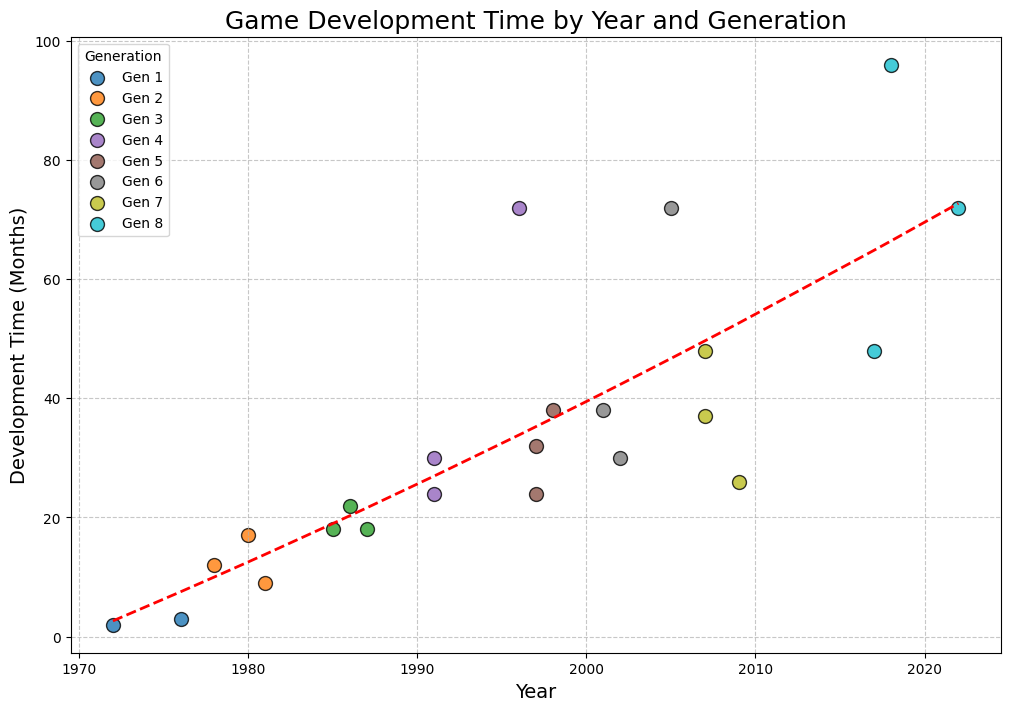

In [20]:
plt.figure(figsize=(12, 8))

scatters = []
for gen in range(1, 9):
    mask = TB['Generation'] == gen
    scatter = plt.scatter(TB[mask]['Year'], TB[mask]['development_time'], color=generation_colors[gen-1], alpha=0.8, edgecolor='k', s=100, label=f'Gen {gen}')
    scatters.append(scatter)

x = TB['Year']
y = TB['development_time']
coefficient = np.polyfit(x, y, 2)
trend = coefficient[0] * x**2 + coefficient[1] * x + coefficient[2]
plt.plot(x, trend, 'r--', linewidth=2, label='Quadratic Trend')


plt.legend(handles=scatters, title='Generation', loc='upper left')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Development Time (Months)', fontsize=14)
plt.title('Game Development Time by Year and Generation', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.7)

As we can see from the graph above, the trend is also growing (although not to the extent of cost), this is also in line with the previous evidence. The development circle being to have larger variety starting at fourth generation, with some even taking longer than sixth generation, however the general trend still apply.

In [21]:
years = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
development_time_months = np.array([2.64, 7.53, 10.02, 12.54, 13.81, 18.97, 20.29, 21.60, 26.96, 26.96, 33.83, 35.23, 35.23, 36.63, 40.90, 42.33, 46.69, 49.64, 49.64, 52.61, 64.83, 66.40, 72.73])
base_year = 2000
x = years - base_year 

coefficientss = np.polyfit(x, development_time_months, 2)
print(coefficientss)

[0.03623179 2.05453106 5.68321739]


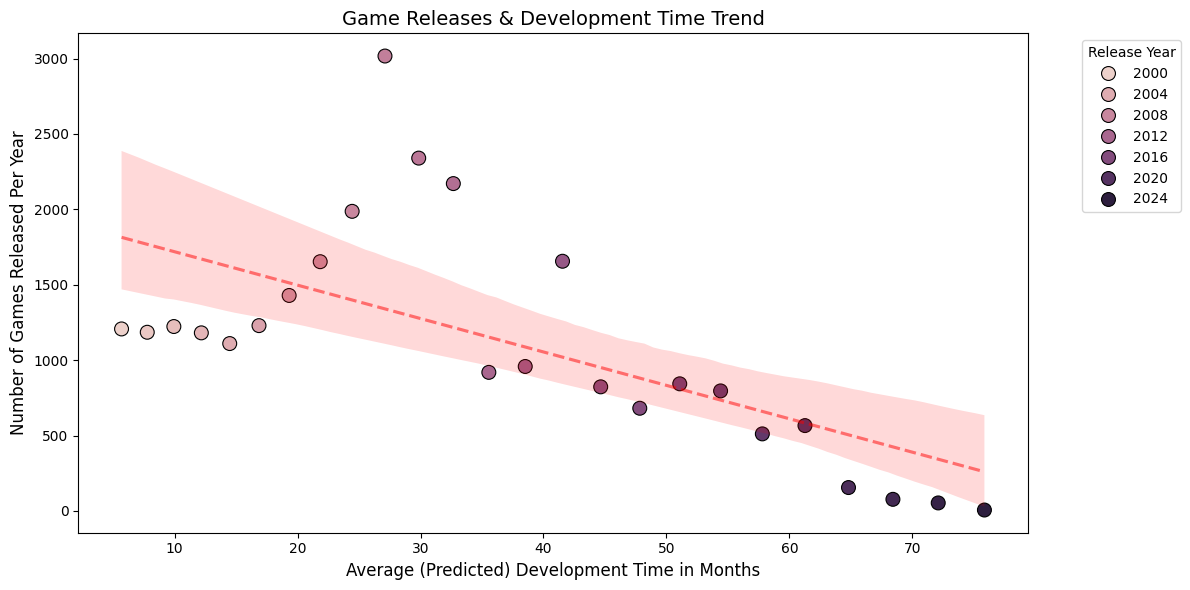

In [22]:
vgs2024 = pd.read_csv("c:/Users/swmax/Downloads/vgchartz-2024-1.csv")
vgs2024 = vgs2024.drop_duplicates(subset=['title'])
vgs2024['release_year'] = pd.to_datetime(vgs2024['release_date']).dt.year
vgs2024['normalized_year'] = vgs2024['release_year'] - 2000

coefficients = np.array([0.03623179, 2.05453106, 5.68321739])
vgs2024['predicted_development_time_months'] = (
    coefficients[0] * vgs2024['normalized_year']**2 +
    coefficients[1] * vgs2024['normalized_year'] +
    coefficients[2]
)

yearly_data = vgs2024.groupby('release_year').agg(
    game_count=('title', 'count'),
    avg_dev_time=('predicted_development_time_months', 'mean')
).reset_index()
yearly_data = yearly_data[yearly_data['release_year'] >= 2000]

fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=yearly_data, x='avg_dev_time', y='game_count', hue='release_year', s=100, edgecolor='black', ax=ax)

sns.regplot(data=yearly_data, x='avg_dev_time', y='game_count', scatter=False, color='red', line_kws={'linestyle': '--', 'alpha': 0.5}, ax=ax)

ax.set_xlabel('Average (Predicted) Development Time in Months', fontsize=12)
ax.set_ylabel('Number of Games Released Per Year', fontsize=12)
ax.set_title('Game Releases & Development Time Trend', fontsize=14)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Release Year')
plt.tight_layout()
plt.show()

In conclusion:

    Action-Adventure genre has become the most popular genre in video games as of 2024

    Rise of PC platform have attracted more game to be published there rather than consoles (with the majority of these new published game being Indie)

    Long development circle and extremely high costs have also led to the decline of consoles game publishing.


Application and recommendation:

Due to the nature of the descriptive analysis, the application of this project has some limitations:

    Lack of predictability for future trends

    Limited to only the publicly available data

    Unable to perform statical test due to predominantly nominal variables (t-test, mean test, regression, etc.)

However, the purpose of this project is to identify the current trend in the video game industry and how did it happen. This could be use as a indicator for any future development of the industry (for example, if similar circumstances occurs, it is most likely for identical result to occur)

    For investors: Due to the popularity of action-adventure genre and the decline in consoles, invest in game companies that have multiplatform action-adventure games in order to maximize profitability, put investment in PC platform companies (Steam), looking for trends that are compatible with current observations when making investment decisions.  

    For gamers: Get a PC and download Steam, it is a better opportunity cost than any consoles as of now. With more game availability and continuous growth, and a dual purpose of using the PC for work/watch videos and play, it is the best investment with limited funding.

    For game developers: Make sure your game is published on PC platform, it is more convenient and the most cost-effective way to publish your game (especially if you are an indie developer). 
